# Project: Investigate a Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

### This is dataset consists of a theatre box office movie dataset collected between year 1966 to year 2015. Columns includes; id, imdb_id, popularity, budget, revenue, original_title, cast, homepage, director, tagline, keywords, overview, runtime, genres, production companies, release date, vote count, vote average, release year, budget_adj, revenue_adj.

- id : This is a unique identity for each entry.
- imdb_id : This is a unique identity for each entry in this movie dataset.
- popularity : This column consists of entry data point for the popularity in each movie.
- budget : This column consists of entry data point for the budget in each movie.
- revenue : This column consists of entry data point for the revenue in each movie.
- original_title : This column consists of entry data for the title in each movie.
- cast : This column consists of entry data for the casts in each movie.
- homepage : This column consists of entry data for the link to each movie.
- director : This column consists of entry data for the directors in each movie.
- tagline : This column consists of entry data for the tag in each movie.
- keywords : This column consists of entry data for some keyword to each movie.
- overview : This column consists of entry data for the summary to each movie.
- runtime : This column consists of entry data point for the runtime to each movie.
- genres : This column consists of entry data for the genre to each movie.
- production companies : This column consists of entry data for the production companies to each movie.
- release date : This column consists of entry data point for the release date to each movie.
- vote count : This column consists of entry data point for the upvote for each movie.
- vote average : This column consists of entry data point for the average upvote for each movie.
- release year : This column consists of entry data point for the year the movie was released.
- budget_adj : This column consists of entry data point for the adjusted budget of the each movie due to inflation.
- revenue_adj : This column consists of entry data point for the adjusted revenue of the each movie due to inflation.

**The first step to analyse a data is to familiarize yourself with the data, then ask questions. I came up with these questions**

1. Which genres are most popular for the last five years of this dataset?
   - This question will help movie producers know what genre viewers watched most in the last five years.
2. Which genres is popular?
   - This question answers the most popular genre in this dataset  
3. What is the correlation between runtime and popularity?
   - This question helps us understand if the length of the movie makes it popular
4. What is the correlation between revenue and budget?
   - This question answers if high budget equals high revenue
5. What kind of properties are associated with movies of high revenue?
   - This question will help movie producers know which genre sells more

In [1]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [2]:
# Load the data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06-09-15,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,04-01-15,2947,7.3,2015,174799923.1,1.385749e+09


### Data Cleaning

In [3]:
#get the number of rows and columns
df.shape

(10866, 21)

So here, there are about 21 columns and 10866 rows. There are some columns that will not be necessary for this analysis, so it's best we drop them. Columns like Overview, id, imdb_id, homepage, keywords. I will also drop budget and revenue as the analysis will be based on inflated budget(budget_adj) and inflated revenue(revenue_adj)

In [4]:
#drop the columns not needed in this analysis
df1 = df.drop(['overview', 'id', 'imdb_id', 'tagline', 'homepage', 'keywords', 'budget', 'revenue'], axis=1)

In [5]:
#recheck the number of rows and columns
df1.shape

(10866, 13)

Now, there are 13 columns and 10866 rows. Next, we check for missing values

In [6]:
#check for missing values
df1.isnull().sum()

popularity                 0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

There are about 4 columns with missing values. Production company has about 9.5% of missing which is also the highest columns missing values. We fill in the missing values with "none" since it is a little percent of the data.

In [7]:
#filling the missing data and checking if we would see any missing data
df1.fillna('none', inplace=True)
df1.isnull().sum().sum()

0

In [8]:
#check for datatypes
df1.dtypes

popularity              float64
original_title           object
cast                     object
director                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

The data column has a string data types instead of a datatime. First, we change it, then check for data type

In [9]:
#change to datetime and check data type again
df1['release_date'] = pd.to_datetime(df1['release_date'])
df1.dtypes

popularity                     float64
original_title                  object
cast                            object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

The release date has been changed to date time

### rename some columns

Now, we are done with data types, let's change some column names

In [10]:
#change column names
df1 = df1.rename(columns = {'release_year' : 'year', 'release_date' : 'date', 'budget_adj' : 'budget', 'revenue_adj' : 'revenue'})

In [11]:
#confirm the columns were dropped
df1.head(1)

,popularity,original_title,cast,director,runtime,genres,production_companies,date,vote_count,vote_average,year,budget,revenue
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939.3,1.392446e+09


The column names have changed.

We have cleaned and trimmed the data. Time to explore the data. So, let's go

<a id='eda'></a>
## Exploratory Data Analysis

To make a good analysis, it is important to look at the description of the dataset

In [12]:
#use the describe function
df1.describe()

,popularity,runtime,vote_count,vote_average,year,budget,revenue
count,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


From the description, There are some impressing figures like the maximum number of runtime. There are also some figure that seems unreal, like the minimum budget which is zero(0), the minimum revenue which is zero(0), and minimum runtime value which is zero(0). While it is believable to have zero(0) minimum budget and revenue. How can minimum runtime for a movie be zero(0)?

Well, let's query the runtime column and see how many it is

In [13]:
#query the runtime column
zero_runtime = df1.query('runtime == 0')
zero_runtime.count()

popularity              31
original_title          31
cast                    31
director                31
runtime                 31
genres                  31
production_companies    31
date                    31
vote_count              31
vote_average            31
year                    31
budget                  31
revenue                 31
dtype: int64

This seems to be an error, seems the values were not inputted into the dataset.

I want to have an insight of the relationship between all numerical variables using scatter plot

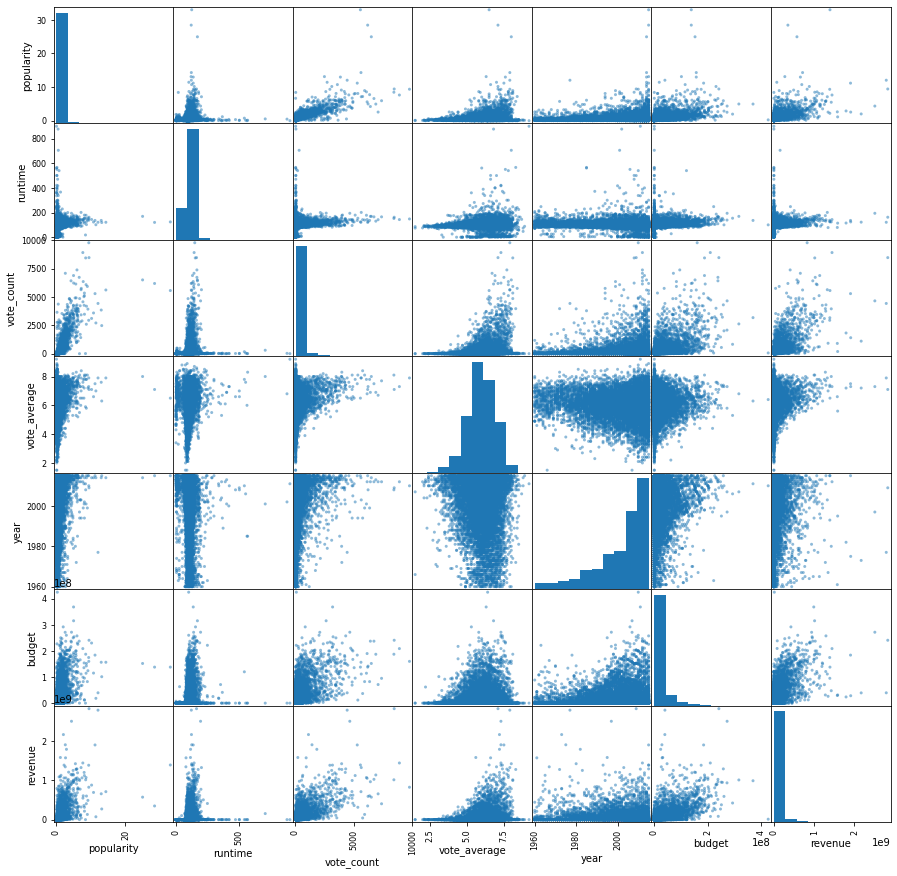

In [14]:
#plot all numerical data using scatter plot
pd.plotting.scatter_matrix(df1, figsize = (15,15));

We can see clearly, the numerical histogram of various plots. Also note that, there are no strong correlation among them.

### The histogram for the year, increases year after year

Let's check the correlation of the dataset using a heatmap

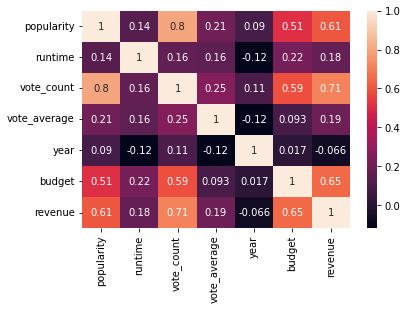

In [15]:
#check for the correlation popularity between revenue, vote counts and year using seaborn
sns.heatmap(df1.corr(), annot=True);

## Few observations
- The higher the popularity, the higher the revenue.
- The higher the popularity, more vote counts.
- There is a positive correlation between popularity and year.

### Research Question 1 (Which genres are most popular for the last five years of this dataset?)

I want to see the genre that has topped the chart for the past five years

In [16]:
#The genre column containes a list for each row, so we separate using the split function
df1['genres'] = df1["genres"].str.split("|")

In [17]:
#After splitting the list, we further separate it one per row using explode function
new_df = df1.explode('genres')

### But first, Let's check the genre that occured most

<AxesSubplot:xlabel='count', ylabel='genres'>

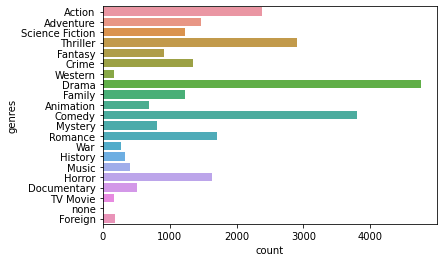

In [18]:
sns.countplot(y='genres', data=new_df)

Drama genre tops the chart. 

Let's check how many unique years we have

In [19]:
print(df1['year'].nunique())
print(df1['year'].unique())

56
[2015 2014 1977 2009 2010 1999 2001 2008 2011 2002 1994 2012 2003 1997
 2013 1985 2005 2006 2004 1972 1980 2007 1979 1984 1983 1995 1992 1981
 1996 2000 1982 1998 1989 1991 1988 1987 1968 1974 1975 1962 1964 1971
 1990 1961 1960 1976 1993 1967 1963 1986 1973 1970 1965 1969 1978 1966]


There are 56 unique years in this dataset, but we want to see the recent trends of the last five years. Now let's which genre tops for the last five years

In [20]:
#first we query the year for the last five years
year15 = new_df.query( 'year == 2015')
year14 = new_df.query( 'year == 2014')
year13 = new_df.query( 'year == 2013')
year12 = new_df.query( 'year == 2012')
year11 = new_df.query( 'year == 2011')

We are done querying the data for the last five years, next is to groupby genres and sort by popularity to get the genres with the highest popularity.

In [21]:
#groupby genres and sort by popularity
df_15 = year15.groupby('genres').mean().sort_values('popularity')
df_14 = year14.groupby('genres').mean().sort_values('popularity')
df_13 = year13.groupby('genres').mean().sort_values('popularity')
df_12 = year12.groupby('genres').mean().sort_values('popularity')
df_11 = year11.groupby('genres').mean().sort_values('popularity')

In [22]:
#display one dataframe to see the output
df_15

,popularity,runtime,vote_count,vote_average,year,budget,revenue
genres,,,,,,,
none,0.187172,95.000000,17.000000,5.550000,2015.0,0.000000e+00,0.000000e+00
Documentary,0.190483,96.017544,47.508772,7.007018,2015.0,2.663157e+04,5.152083e+05
TV Movie,0.260574,86.250000,25.700000,6.100000,2015.0,1.379999e+05,0.000000e+00
Horror,0.476670,89.104000,103.528000,5.008800,2015.0,2.168255e+06,7.131260e+06
Music,0.635101,101.666667,160.363636,6.442424,2015.0,3.964362e+06,1.964576e+07
Drama,0.937877,104.192308,258.057692,6.078846,2015.0,7.617659e+06,2.262774e+07
Comedy,0.938527,92.320988,299.882716,6.019136,2015.0,1.260273e+07,4.361023e+07
Romance,0.948865,100.964912,270.421053,6.092982,2015.0,6.946804e+06,2.759893e+07
History,1.007905,120.200000,299.000000,6.513333,2015.0,1.274506e+07,1.660334e+07


Now, let's plot for each year

Text(0, 0.5, 'popularity')

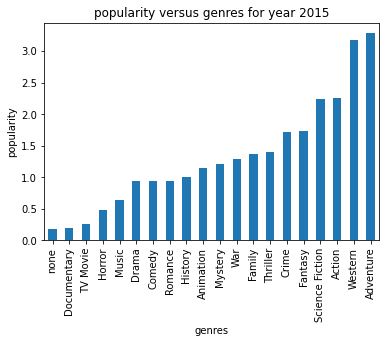

In [23]:
#plotting for year 2015
df_15['popularity'].plot(kind='bar')
plt.title('popularity versus genres for year 2015')
plt.xlabel('genres')
plt.ylabel('popularity')

Text(0, 0.5, 'popularity')

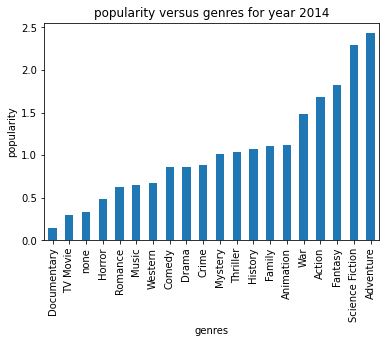

In [24]:
#plotting for year 2014
df_14['popularity'].plot(kind='bar')
plt.title('popularity versus genres for year 2014')
plt.xlabel('genres')
plt.ylabel('popularity')

Text(0, 0.5, 'popularity')

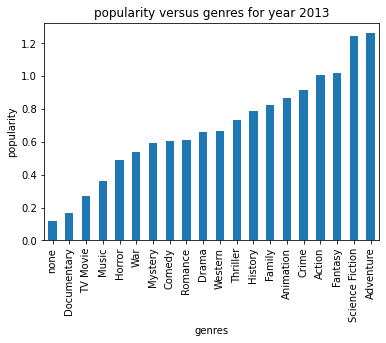

In [25]:
#plotting for year 2013
df_13['popularity'].plot(kind='bar')
plt.title('popularity versus genres for year 2013')
plt.xlabel('genres')
plt.ylabel('popularity')

Text(0, 0.5, 'popularity')

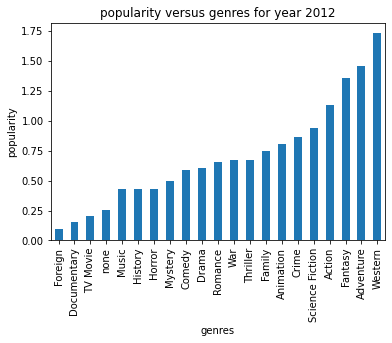

In [26]:
#plotting for year 2012
df_12['popularity'].plot(kind='bar')
plt.title('popularity versus genres for year 2012')
plt.xlabel('genres')
plt.ylabel('popularity')

Text(0, 0.5, 'popularity')

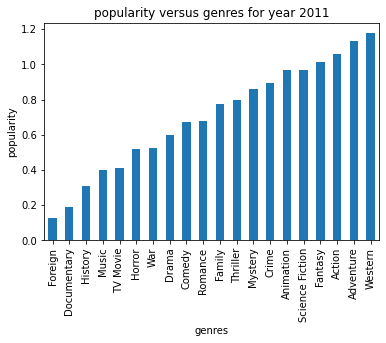

In [27]:
#plotting for year 2011
df_11['popularity'].plot(kind='bar')
plt.title('popularity versus genres for year 2011')
plt.xlabel('genres')
plt.ylabel('popularity')

In [28]:
#here, groupby genres and sort by budget
df_15 = year15.groupby('genres').mean().sort_values('popularity')
df_11 = year11.groupby('genres').mean().sort_values('popularity')

In [29]:
#print the values
print(df_15)

                 popularity     runtime   vote_count  vote_average    year  \
genres                                                                       
none               0.187172   95.000000    17.000000      5.550000  2015.0   
Documentary        0.190483   96.017544    47.508772      7.007018  2015.0   
TV Movie           0.260574   86.250000    25.700000      6.100000  2015.0   
Horror             0.476670   89.104000   103.528000      5.008800  2015.0   
Music              0.635101  101.666667   160.363636      6.442424  2015.0   
Drama              0.937877  104.192308   258.057692      6.078846  2015.0   
Comedy             0.938527   92.320988   299.882716      6.019136  2015.0   
Romance            0.948865  100.964912   270.421053      6.092982  2015.0   
History            1.007905  120.200000   299.000000      6.513333  2015.0   
Animation          1.146298   64.871795   361.897436      6.492308  2015.0   
Mystery            1.214847  104.380952   343.619048      5.6428

In [30]:
print(df_11)

                 popularity     runtime  vote_count  vote_average    year  \
genres                                                                      
Foreign            0.129987   94.357143   13.642857      6.250000  2011.0   
Documentary        0.188776  116.142857   31.795918      7.089796  2011.0   
History            0.309167  114.625000  120.500000      5.837500  2011.0   
Music              0.398139  108.588235   92.764706      6.464706  2011.0   
TV Movie           0.411282   82.800000   45.600000      6.070000  2011.0   
Horror             0.521678   89.653846   85.461538      5.033333  2011.0   
War                0.525725  112.444444  101.555556      5.933333  2011.0   
Drama              0.598544  105.257009  186.929907      6.151402  2011.0   
Comedy             0.670374   92.412791  222.087209      5.936628  2011.0   
Romance            0.675694   99.413333  222.586667      6.065333  2011.0   
Family             0.776302   84.083333  256.958333      6.130556  2011.0   

Here, we plot one representation of the first two and the last three

Text(0, 0.5, 'budget')

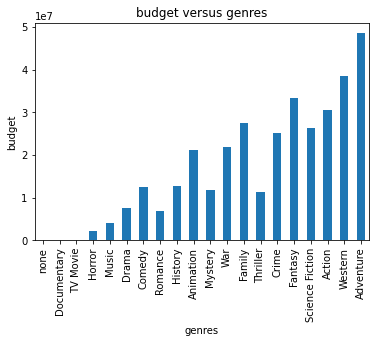

In [31]:
#plot year 2015
df_15['budget'].plot(kind='bar')
plt.title('budget versus genres')
plt.xlabel('genres')
plt.ylabel('budget')

Text(0, 0.5, 'budget')

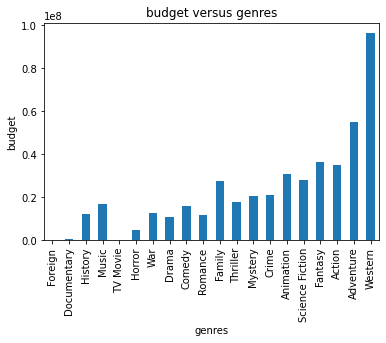

In [32]:
#plot year 2011
df_11['budget'].plot(kind='bar')
plt.title('budget versus genres')
plt.xlabel('genres')
plt.ylabel('budget')

### Research Question 2  (Which genres has the highest average?)

Here, We want to know which genre has high average

In [33]:
#groupby genres and sort by popularity
gen_av = new_df.groupby('genres').mean().sort_values('vote_average')
gen_av

,popularity,runtime,vote_count,vote_average,year,budget,revenue
genres,,,,,,,
Horror,0.465357,94.424557,120.059866,5.337447,2001.117288,7.764841e+06,2.408271e+07
Science Fiction,1.001218,99.413821,436.830081,5.665041,1999.986992,2.952468e+07,8.690849e+07
Thriller,0.741513,103.243810,255.434319,5.750413,2001.696355,2.068617e+07,5.526742e+07
Action,0.926136,104.912369,392.875052,5.787421,2000.060377,3.295887e+07,9.172020e+07
TV Movie,0.270896,91.982036,34.365269,5.788024,2004.634731,2.960215e+05,3.496353e+05
Fantasy,0.992840,100.736900,420.741266,5.863537,2000.292576,3.742932e+07,1.112342e+08
Comedy,0.592607,96.745057,176.436330,5.905167,2000.816240,1.592031e+07,4.789700e+07
Adventure,1.154259,106.173351,513.125085,5.940585,1999.388851,4.393734e+07,1.416752e+08
Mystery,0.690012,105.928395,236.998765,5.946790,1999.850617,1.948231e+07,5.088930e+07


Text(0, 0.5, 'vote_average')

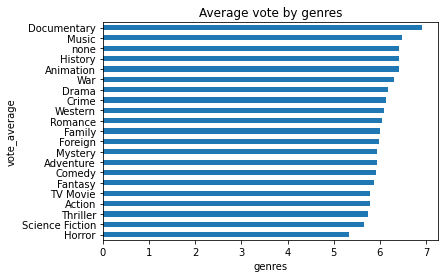

In [34]:
#plot genre against popularity
gen_av['vote_average'].plot(kind='barh')
plt.title('Average vote by genres')
plt.xlabel('genres')
plt.ylabel('vote_average')

Clearly, documentary genre is more votes

### Research Question 3  (correlation between runtime and popularity)

Here, We want to understand if the more runtime a movie has, the more it becomes popular

In [35]:
#groupby runtime and sort by popularity
run_pop = new_df.groupby(['runtime'],as_index=False)['popularity'].sum().sort_values(by=['popularity'])
run_pop

,runtime,popularity
242,561,0.000195
225,294,0.003062
18,19,0.003731
246,900,0.006925
230,360,0.008996
...,...,...
90,95,460.453036
92,97,468.343199
88,93,489.321752
95,100,501.213798


In [36]:
def scatter_plot(x,y,xlabel,ylabel):
    '''
    A function to draw a scatter plot
    '''
    plt.scatter(x,y,s=80,c='blue',edgecolors='black')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(ylabel+ ' vs '+ xlabel)
    plt.show()

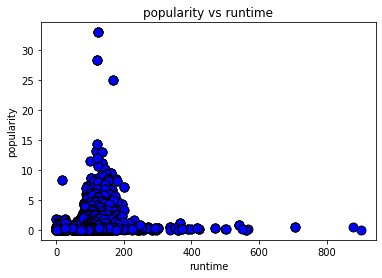

In [37]:
scatter_plot(new_df['runtime'],new_df['popularity'],'runtime','popularity')

It doesn't seem to be the case here. This is a weak positive correlation.

### Research question 4 (What is the correlation between revenue and budget?) 

Here, we want to know if a high budget will result to a high revenue

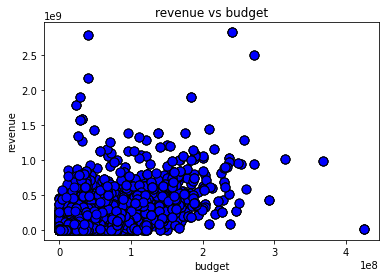

In [38]:
scatter_plot(new_df['budget'],new_df['revenue'],'budget','revenue')

It doesn't seem like the more budget, the more revenue. This is a positive correlation, but it isn't strong. This brings us to the last question. So let's check the genre that makes highest revenue

### Research Question 5  (What kind of properties are associated with movies of high revenue?)

In [39]:
#groupby genres and sort by revenue
gen_rev = new_df.groupby('genres').sum().sort_values('revenue')
gen_rev

,popularity,runtime,vote_count,vote_average,year,budget,revenue
genres,,,,,,,
none,3.863223,1625,403,147.7,46107,2.808184e+04,0.000000e+00
TV Movie,45.239592,15361,5739,966.6,334774,4.943559e+07,5.838910e+07
Foreign,36.001309,20159,3126,1124.5,376263,4.472804e+08,3.354458e+08
Documentary,94.344445,53379,18255,3592.4,1044323,3.240758e+08,1.174269e+09
Western,97.451554,19400,33947,1003.7,327841,4.042078e+09,7.606709e+09
History,192.362605,45493,61380,2141.1,667164,8.870380e+09,1.601483e+10
War,196.474450,34459,73098,1700.4,538946,7.811118e+09,1.889625e+10
Music,198.827043,42896,50731,2644.0,816080,5.299457e+09,1.903562e+10
Horror,761.788804,154573,196538,8737.4,3275829,1.271104e+10,3.942340e+10


Text(0, 0.5, 'budget')

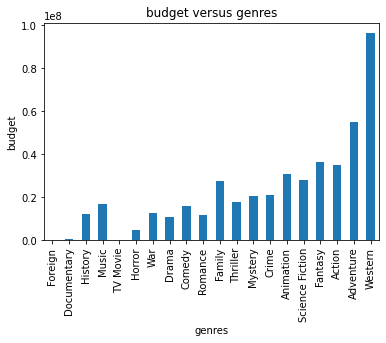

In [40]:
#plot year 2011
df_11['budget'].plot(kind='bar')
plt.title('budget versus genres')
plt.xlabel('genres')
plt.ylabel('budget')

Text(0, 0.5, 'revenue')

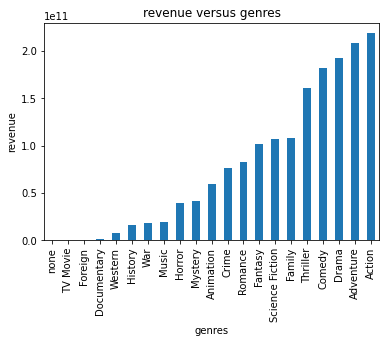

In [41]:
#Plot to see your output
gen_rev['revenue'].plot(kind='bar')
plt.title('revenue versus genres')
plt.xlabel('genres')
plt.ylabel('revenue')

<a id='conclusions'></a>
## Conclusions

**Conclusions from the analysis**
1. There is a strong positive correlation between popularity and year.
2. The adventure genre was popular in the last five years.
3. There are more drama genre in this dataset.
4. The correlation between runtime and popularity is weak. The runtime of a movie does not equal its popularity
5. The correlation between budget and revenue is positive but not strong. Therefore, High budget will not always result to high revenue.
6. Action genre has the highest revenue.
7. The higher the popularity, the higher the revenue.
8. The higher the popularity, more vote counts.


**Limitations of this dataset**
1. Some genre rows were missing which affected our output for the first question.
2. Minimum runtime for a movie was zero and they were about 31 columns with zero entry. It seems that was a wrong entry.